# Basic Topology

Notebook playground to analyze basic topology of Wikipedia article links graph.

In [1]:
import collections
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [11]:
graphml_file = "../data/degree_stratified_slice_subset.graphml"

G = nx.read_graphml(graphml_file, node_type=int)
G = G.to_directed()

orphan_nodes = [node for node in G.nodes() if G.in_degree(node) == 0 and G.out_degree(node) == 0]
G.remove_nodes_from(orphan_nodes)

### Number of Nodes and Edges

In [12]:
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 597019
Number of edges: 3914318


### Average Degree

In [13]:
in_degrees = [degree for _, degree in G.in_degree()]
out_degrees = [degree for _, degree in G.out_degree()]

In [14]:
print("In-Degree metrics:")
print("Min degree:", np.min(in_degrees))
print("Max degree:", np.max(in_degrees))
print("Average degree:", np.mean(in_degrees))
print("Median degree:", np.median(in_degrees))
print("90th percentile:", np.percentile(in_degrees, 90))
print("95th percentile:", np.percentile(in_degrees, 95))
print("99th percentile:", np.percentile(in_degrees, 99))

In-Degree metrics:
Min degree: 0
Max degree: 32542
Average degree: 6.556437902311317
Median degree: 1.0
90th percentile: 5.0
95th percentile: 9.0
99th percentile: 52.0


In [15]:
print("Out-Degree metrics:")
print("Min degree:", np.min(out_degrees))
print("Max degree:", np.max(out_degrees))
print("Average degree:", np.mean(out_degrees))
print("Median degree:", np.median(out_degrees))
print("90th percentile:", np.percentile(out_degrees, 90))
print("95th percentile:", np.percentile(out_degrees, 95))
print("99th percentile:", np.percentile(out_degrees, 99))

Out-Degree metrics:
Min degree: 0
Max degree: 840
Average degree: 6.556437902311317
Median degree: 4.0
90th percentile: 14.0
95th percentile: 21.0
99th percentile: 50.0


### Graph Density

- $\approx$0 Extremely sparse (e.g., social networks, web graphs)
- $\approx$1 Fully connected (rare in real-world systems).
- Real-world networks: Often have densities between $10^{-6}$ and $10^{-2}$

In [7]:
nx.density(G)

1.098197692919027e-05

### Degree Distribution

Results roughly show a Power-Law relationship.

- In-Degree Plot: Shows how many articles are linked to (e.g., high in-degree = "hub" articles like "Mathematics").
- Out-Degree Plot: Shows how many articles link out (e.g., high out-degree = "connector" articles like "Lists of topics").

In [8]:
in_degree_counts = collections.Counter(in_degrees)
out_degree_counts = collections.Counter(out_degrees)

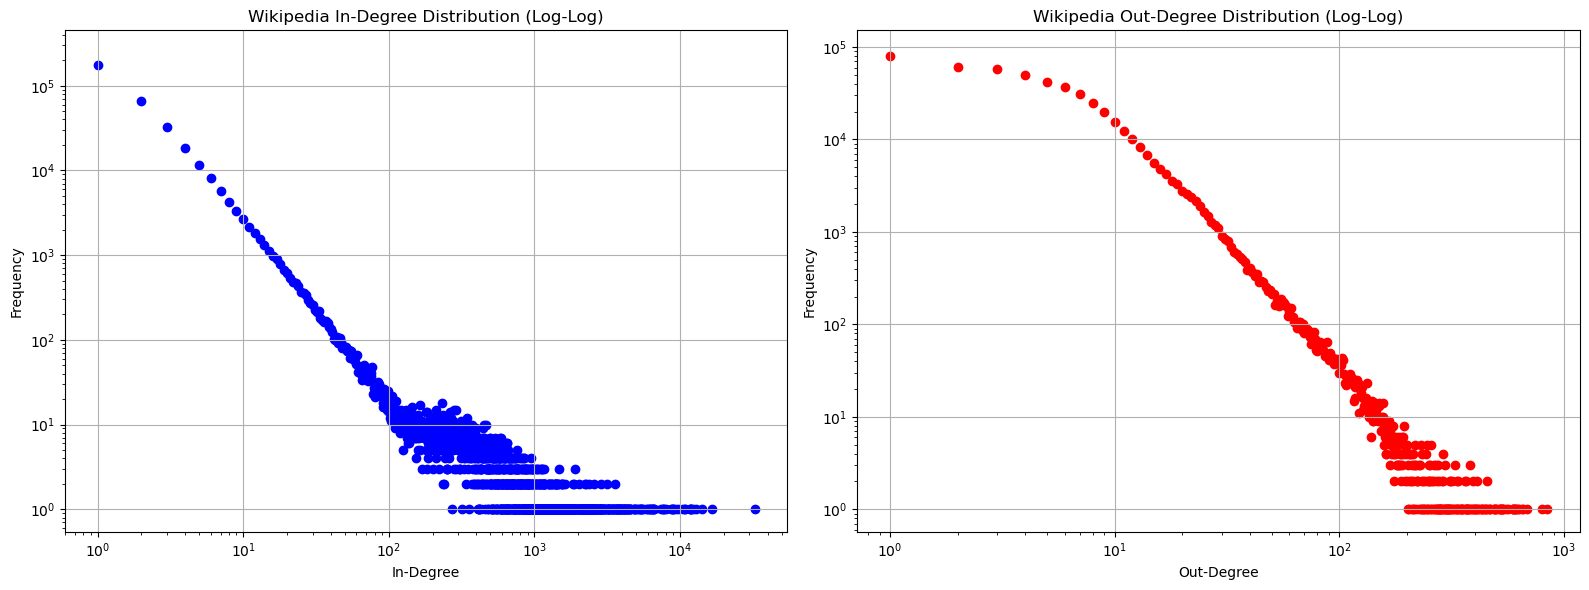

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.scatter(in_degree_counts.keys(), in_degree_counts.values(), color='blue')
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_title("Wikipedia In-Degree Distribution (Log-Log)")
ax1.set_xlabel("In-Degree")
ax1.set_ylabel("Frequency")
ax1.grid(True)

ax2.scatter(out_degree_counts.keys(), out_degree_counts.values(), color='red')
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_title("Wikipedia Out-Degree Distribution (Log-Log)")
ax2.set_xlabel("Out-Degree")
ax2.set_ylabel("Frequency")
ax2.grid(True)

plt.tight_layout()
plt.show()

### Connected Components

In [16]:
sccs = list(nx.strongly_connected_components(G))

# Count SCCs
num_scc = len(sccs)
print(f"Number of SCCs: {num_scc}")

# Get the largest SCC
largest_scc = max(sccs, key=len)
print(f"Largest SCC size: {len(largest_scc)}")

Number of SCCs: 392414
Largest SCC size: 190266


In [17]:
G_giant_scc = G.subgraph(largest_scc).copy()

Number of SCCs: 392414


NameError: name 'giant_scc' is not defined

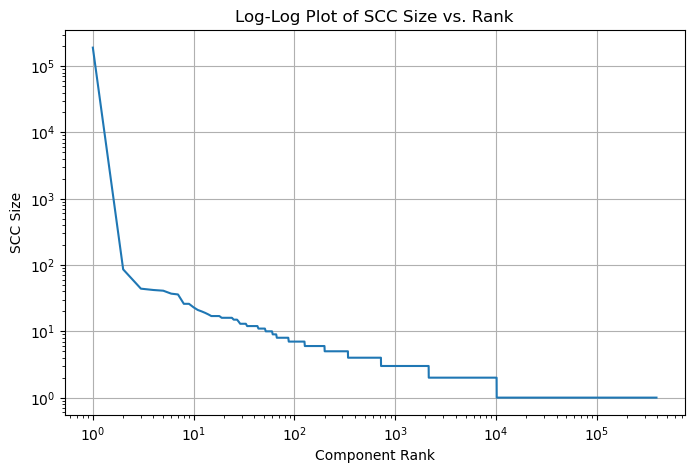

In [20]:
scc_sizes = [len(scc) for scc in sccs]

scc_sizes = sorted([len(scc) for scc in sccs], reverse=True)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(scc_sizes)+1), scc_sizes)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Component Rank")
plt.ylabel("SCC Size")
plt.title("Log-Log Plot of SCC Size vs. Rank")
plt.grid(True)
plt.show()